In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection

In [2]:
dataframe = pd.read_csv('boston_x_y_train.csv')

x = dataframe.drop(dataframe.columns[[-1]], axis = 1, inplace = False)
X = x.to_numpy()

y = dataframe.drop(dataframe.iloc[:, 0:13], inplace = False, axis = 1)
Y = y.to_numpy()
Y = np.reshape(Y, -1)


In [ ]:
print(x)
print(y)

In [3]:
print(X)
print(Y)

[[-0.40784991 -0.48772236 -1.2660231  ... -0.30309415  0.41057102
  -1.09799011]
 [-0.40737368 -0.48772236  0.24705682 ...  0.1130321   0.29116915
  -0.52047412]
 [ 0.1251786  -0.48772236  1.01599907 ...  0.80657583 -3.79579542
   0.89107588]
 ...
 [-0.40831101 -0.48772236  0.24705682 ...  0.1130321   0.33206621
  -0.33404299]
 [-0.41061997 -0.48772236 -1.15221381 ... -0.71922039  0.203235
  -0.74475218]
 [ 0.34290895 -0.48772236  1.01599907 ...  0.80657583  0.38787479
  -1.35871335]]
[37.9 21.4 12.7 19.9 22.5 32.7 23.2 21.5 20.5 33.3 23.1 20.  50.  25.
 20.2 16.4 22.4 20.4 18.4 37.3 23.1 34.7 33.1 28.7 15.6 18.2 17.2 31.5
 26.6 24.1 22.3 19.5 36.1 17.6 33.4  8.8  9.7 13.4 39.8 24.4 17.8 24.3
 24.  23.1 13.1 16.7 22.8 27.5 14.6 13.4 11.  19.4 15.  44.8 29.6 12.3
 24.6 10.9 28.  30.8 15.4 18.  35.2 11.5 19.5 24.8 22.2 20.1 15.2 50.
 17.1 23.  12.  22.  20.  20.3 17.2 37.2  5.  24.5 18.9 24.5 24.8 21.6
  7.  17.7 12.8 14.9 18.3 15.6 19.9 22.2 16.7 32.5 25.1 30.1 16.1 20.7
 46.  22.3 23. 

In [4]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y)

In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(284, 13)
(95, 13)
(284,)
(95,)


# Gradient_Descnt Inbuilt in SciKit-learn

In [6]:
from sklearn.ensemble import GradientBoostingRegressor
grad_alg1 = GradientBoostingRegressor()

In [7]:
grad_alg1.fit(x_train, y_train)

GradientBoostingRegressor()

In [ ]:
'''from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(x_train, y_train)'''

In [8]:
y_pred = grad_alg1.predict(x_test)
print(y_pred)

[21.53183076 18.64509968 16.53846953 25.91325013 20.78713848 34.34769872
 22.39611313 18.24635577 19.69196954 31.47688877 38.29855863  8.70241819
 35.18712715 22.41803532 21.21000047 27.69557758 41.68571956 26.00787194
 19.05275437 19.38012104 11.95108527 16.76053464 19.42435116 12.30565805
 25.12421147 13.79965058 21.23948176 26.40593024 27.40473722 15.7412569
 11.49709    20.53712652 45.73064712 36.62369085 21.22926684 40.97673626
 22.84079847 23.69428435 16.03624643 33.54113067 21.97829639 24.26507782
  9.36130781 23.93044717 17.85146131 17.90425436 19.31302204 25.16460439
 24.98748161 15.78295189 16.00144873 20.37311725 23.48302699 32.90898376
 24.06850059 19.42074262 21.97829639 25.00208434 18.82532173 21.25405886
 22.08739121 34.69967782 24.15010944 24.77019476 19.17046715  7.82144409
 15.93164544 15.04151729 18.84671844 12.13317101 14.74459379 15.60254719
 13.0863121  24.00250554 44.32123677  8.80100175 21.49612336 19.76194254
  5.87765882 21.04287875 14.95560304 30.89264339 15.

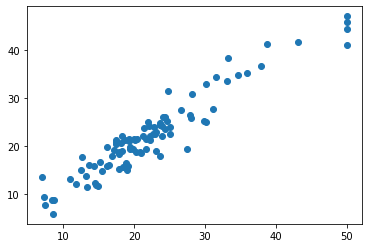

In [9]:
plt.scatter(y_test, y_pred)
plt.show()

## Writing Predictions File

In [10]:
df_test = np.loadtxt('boston_x_test.csv', delimiter = ',')
print(df_test) 

[[ 2.91816626 -0.48772236  1.01599907 ...  0.80657583 -1.59755122
   1.04106182]
 [-0.40339151 -0.48772236  0.40609801 ... -1.13534664  0.44105193
  -0.89473812]
 [-0.4131781  -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.50084979]
 ...
 [-0.41001449  2.08745172 -1.37837329 ... -0.0719129   0.39094481
  -0.68167397]
 [-0.40317611 -0.48772236 -0.37597609 ...  1.13022958  0.34007019
   0.20142086]
 [-0.13356344 -0.48772236  1.2319449  ... -1.73641788 -2.93893082
   0.48877712]]


In [11]:
new_y_Pred = grad_alg1.predict(df_test)
print(new_y_Pred)

[11.74440059 27.41044636 17.92554315 22.59158363 20.89122421 12.9767811
 28.97867438 27.91106581 19.60829144 23.40710246 23.28404523 18.06487336
 19.26670804 21.69733795 51.20096303 18.14025984 23.58559532 22.36451577
 17.35649262 31.41007976 21.96956568 21.25360176 37.76122611 30.49010762
 36.2360365  14.93480337 21.55009256 30.38383862 20.48159636 28.05240918
 17.76163927 25.00812065 19.98327754 22.84048048  9.2166131  23.97221074
 22.45044409 20.6034706  22.22243428  9.7589695  15.57735639 23.9091634
 26.66470252 20.1015188  20.9739255   6.97225582 41.46031278 24.62739102
 34.17114232 12.93473271 15.2759654  45.8227038  13.78020163 21.70849508
 16.78088136 19.6688136  20.80068583 21.50085244 15.67865572 15.23724818
 14.68571694 28.14242256 23.17377246 23.10843797 13.95439411 14.66907326
 32.88311796 15.05810026 21.7889421  21.38962569 26.39802786 22.20909419
 18.60648937  7.2268694  40.07353334 21.96449031 25.20390866 24.3672767
 12.01387128 33.17051814 21.14496623 20.3552626  20.77

In [ ]:
'''with open('Boston_result.csv', 'w') as out:
    out_data = csv.writer(out, delimiter = ',')
    out_data.writerow(new_y_Pred)
print('Done')'''

In [12]:
np.savetxt("Boston_result.csv",new_y_Pred,delimiter=",",fmt='%f')